In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load CSV file
df = pd.read_csv('/content/Housing.csv')

In [3]:
# Check dataset
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
# Drop missing values if any
df = df.dropna()

In [21]:
 #Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Part 1: Simple Linear Regression

In [11]:
#  Select one feature
X_simple = df[['bathrooms']]
y = df['price']

In [12]:
#  Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [13]:
#  Train model
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)


LinearRegression()

In [14]:
#  Predict
y_pred_s = simple_model.predict(X_test_s)

In [15]:
# Evaluation
print("\nSimple Linear Regression Evaluation:")
print(f"MAE: {metrics.mean_absolute_error(y_test_s, y_pred_s)}")
print(f"MSE: {metrics.mean_squared_error(y_test_s, y_pred_s)}")
print(f"R2 Score: {metrics.r2_score(y_test_s, y_pred_s)}")


Simple Linear Regression Evaluation:
MAE: 1499746.4311620966
MSE: 3951199278132.8564
R2 Score: 0.21829174676551721


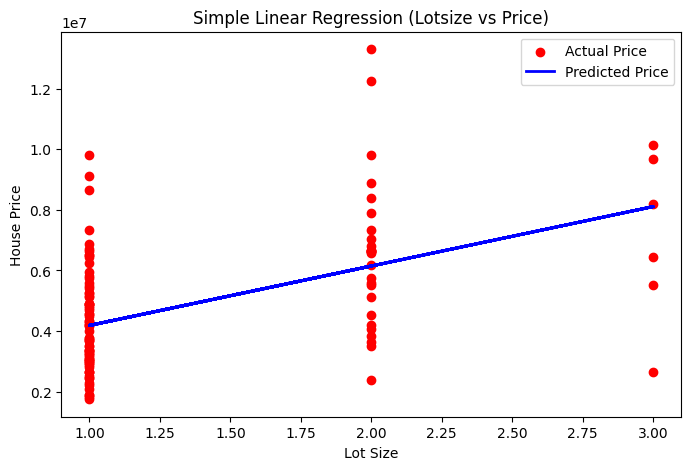


Coefficient (Slope): 1960953.6091060522
Intercept: 2223852.173792338


In [17]:
# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_test_s, y_test_s, color='red', label='Actual Price')
plt.plot(X_test_s, y_pred_s, color='blue', linewidth=2, label='Predicted Price')
plt.title('Simple Linear Regression (Lotsize vs Price)')
plt.xlabel('Lot Size')
plt.ylabel('House Price')
plt.legend()
plt.show()
print("\nCoefficient (Slope):", simple_model.coef_[0])
print("Intercept:", simple_model.intercept_)

# Part 2: Multiple Linear Regression

In [28]:
# Select multiple features
features = ['bathrooms','bedrooms']

X_multi = df[features]
y = df['price']

In [29]:
# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [30]:
# Train model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

LinearRegression()

In [31]:
# Predict
y_pred_m = multi_model.predict(X_test_m)

In [32]:
# Evaluation
print("\nMultiple Linear Regression Evaluation:")
print(f"MAE: {metrics.mean_absolute_error(y_test_m, y_pred_m)}")
print(f"MSE: {metrics.mean_squared_error(y_test_m, y_pred_m)}")
print(f"R2 Score: {metrics.r2_score(y_test_m, y_pred_m)}")


Multiple Linear Regression Evaluation:
MAE: 1462601.8965312992
MSE: 3737500333041.07
R2 Score: 0.2605701076698277


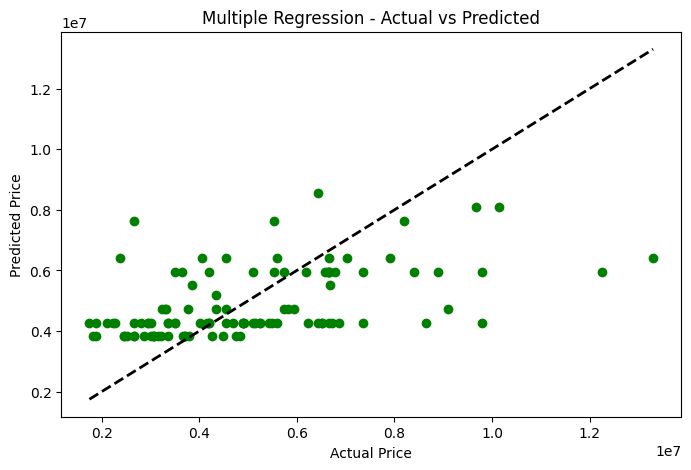

In [33]:
# Actual vs Predicted (Multiple Regression)
plt.figure(figsize=(8,5))
plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.title('Multiple Regression - Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [34]:
#Coefficients
coef_multi = pd.DataFrame(multi_model.coef_, features, columns=['Coefficient'])
print("\nMultiple Regression Coefficients:\n")
print(coef_multi)
print("\nIntercept:", multi_model.intercept_)


Multiple Regression Coefficients:

            Coefficient
bathrooms  1.683532e+06
bedrooms   4.524323e+05

Intercept: 1236464.4910654202


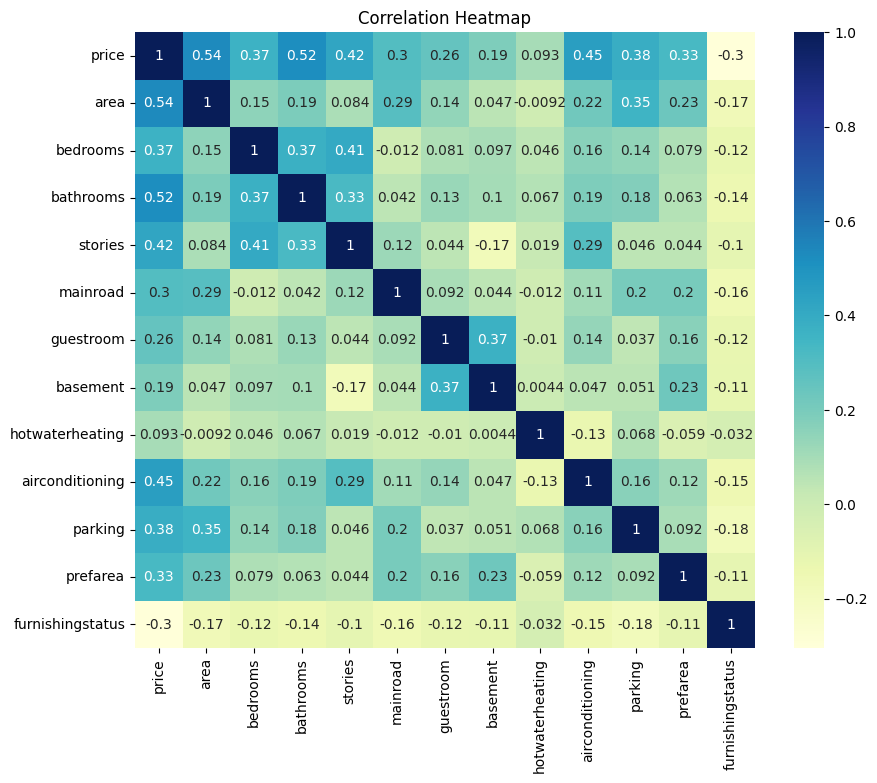

In [35]:
 #Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()